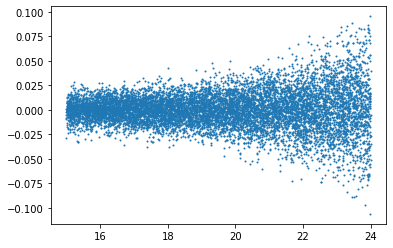

In [102]:
# !pip install numpy
# !pip install matplotlib


import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
%matplotlib inline  

N = 10000
x = 15 + np.random.random(N) * 9
y = np.random.normal(loc = 0.0, scale=0.1, size=N) / (x.max()*1.1 - x)

plt.scatter(x, y, s=1)

[0.00971274 0.00937105 0.00980848 0.01007179 0.01032953 0.011569
 0.01200248 0.01220817 0.01277782 0.01390049 0.01499563 0.01572929
 0.0189125  0.01821551 0.02058077 0.02264763 0.02547934 0.02852442
 0.03082322 0.03587353]


<ErrorbarContainer object of 3 artists>

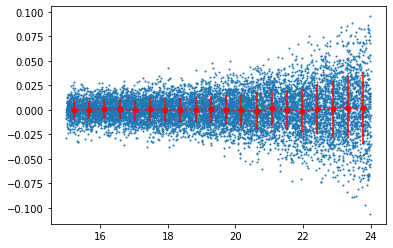

In [103]:
sn = 20
sx = np.linspace(x.min(), x.max(), sn + 1)
h2 = (sx[1]-sx[0]) / 2

med = np.zeros(sn, dtype=float)
sig = np.zeros(sn, dtype=float)

sy_data = []
sx_data = []
for i in range(sn):
    sy_data.append(y[((x>=sx[i]) & (x<sx[i+1]))])
    sx_data.append(x[((x>=sx[i]) & (x<sx[i+1]))])
    
for i, sy_seq in enumerate(sy_data[:]):
    med[i] = np.mean(np.array(sy_seq))
    sig[i] = np.std(sy_seq)
    
print(sig)

plt.scatter(x, y, s=1)
plt.plot(sx[:-1]+h2, med, 'r:')
plt.errorbar(sx[:-1]+h2, med, sig, fmt='r.', markersize=10)


<ErrorbarContainer object of 3 artists>

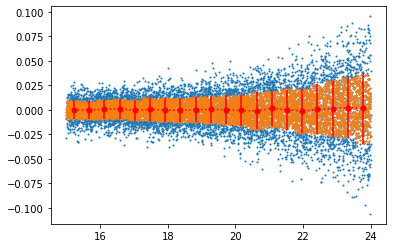

In [105]:
sy_filtered_data = []
for i, sy_seq in enumerate(sy_data[:]):
    sy_filtered_data.append(sigma_clip(sy_seq, sigma=1, maxiters=1))

# print(sy_filtered_data[0])
sy_filtered = np.ma.array(sy_filtered_data[0])
sx_filtered = np.ma.array(sx_data[0])
for i in range(1, sn):
    sy_filtered = np.ma.concatenate((sy_filtered, sy_filtered_data[i]), axis=None)
    sx_filtered = np.ma.concatenate((sx_filtered, sx_data[i]), axis=None)
    
plt.scatter(x, y, s=1)
plt.scatter(sx_filtered, sy_filtered, s=1)
plt.plot(sx[:-1]+h2, med, 'r:')
plt.errorbar(sx[:-1]+h2, med, sig, fmt='r.', markersize=10)


    